In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('99053_AllData.csv')
pd.set_option('display.max_rows', 120)

In [8]:
data.replace(' ', np.nan, inplace=True)
data.replace('-9', np.nan, inplace=True)
data.replace('-1', np.nan, inplace=True)
data.replace('-7', np.nan, inplace=True)
data.replace('-8', np.nan, inplace=True)

data.dtypes

    # data types that need to change from object to float
    # AGE0, INTDAY7, AGE7,INTDAY10, AGE10, P_STRESS, BMI0, BMI7, BMI10

data[['AGE0', 'INTDAY7', 'AGE7','INTDAY10', 'AGE10', 'P_STRESS', 'BMI0', 'BMI7', 'BMI10']] = data[['AGE0', 'INTDAY7', 'AGE7','INTDAY10', 'AGE10', 'P_STRESS', 'BMI0', 'BMI7', 'BMI10']].astype(float)

data['RACE'] = data.ETHNIC.map({1:'Black', 8:'Asian', 9:'Asian', 10:'Caucasian', 13:'Hispanic'})
data['ETHNIC_CAT'] = data.ETHNIC.map({1:'Black', 8:'Japanese', 9:'Chinese', 10:'Caucasian', 13:'Hispanic'})

In [24]:
test_cols = ['DISC_AVGSCORE0', 'LV_AGE0', 'LV_AGE7', 'RACE']
test_data = data[test_cols]

In [25]:
test_data.isnull().sum()

DISC_AVGSCORE0       6
LV_AGE0             35
LV_AGE7           1374
RACE                 0
dtype: int64

In [28]:
test_data.dropna(inplace=True)

c:\Users\Corinne\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
test_data.isnull().sum()

DISC_AVGSCORE0    0
LV_AGE0           0
LV_AGE7           0
RACE              0
dtype: int64

In [30]:
test_data.shape

(1909, 4)

In [31]:
X_cols = ['DISC_AVGSCORE0']
Y_cols = ['LV_AGE0']

X = test_data[X_cols]
Y = test_data[Y_cols]

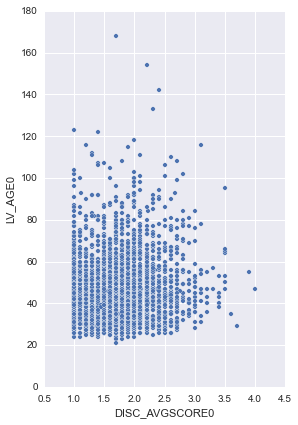

In [33]:
sns.pairplot(data, x_vars='DISC_AVGSCORE0', y_vars = 'LV_AGE0', size=6, aspect=0.7)

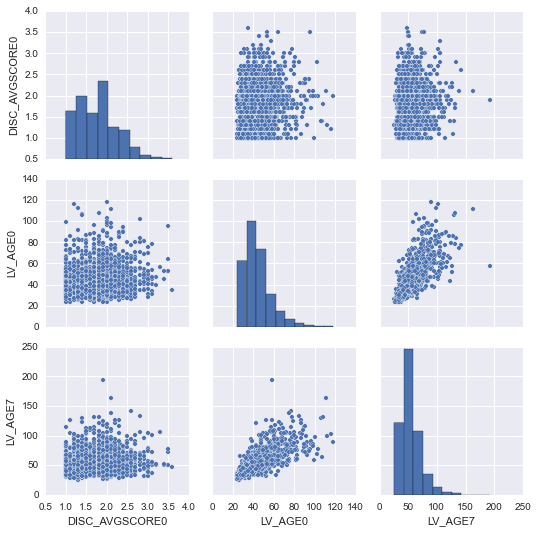

In [34]:
sns.pairplot(test_data)

In [35]:
test_data.corr()

,DISC_AVGSCORE0,LV_AGE0,LV_AGE7
DISC_AVGSCORE0,1.000000,0.117578,0.112815
LV_AGE0,0.117578,1.000000,0.734298
LV_AGE7,0.112815,0.734298,1.000000


In [36]:
lm = smf.ols(formula='LV_AGE0 ~ DISC_AVGSCORE0', data=test_data).fit()

In [37]:
lm.params

Intercept         38.147201
DISC_AVGSCORE0     3.363045
dtype: float64

In [38]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                LV_AGE0   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     26.73
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           2.58e-07
Time:                        07:01:47   Log-Likelihood:                -7675.5
No. Observations:                1909   AIC:                         1.536e+04
Df Residuals:                    1907   BIC:                         1.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         38.1472      1.189     32.

In [40]:
lm.pvalues

Intercept         7.402600e-181
DISC_AVGSCORE0     2.580597e-07
dtype: float64